> # Test submitting para el rol de data scientist junior en TusDatos.co
***
>## Juan Pablo Alfonso Sánchez

## Preparación

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline
%reload_ext autoreload
%autoreload 2
warnings.filterwarnings('ignore')

## Importar datos 

In [35]:
df = pd.read_csv("https://raw.githubusercontent.com/JPalfonsos/TusDatos/main/Cruceros.csv")
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


## Estadística descriptiva e Insights

En promedio los barcos comprados alojan hasta 18 pasajeros (con una varianza de 9), tienen 9 cabinas (con una varianza de 4) y tiene una tripulación de 8 personas (con una varianza de 4)

In [20]:
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


### Insights 1: Distribución univariada

Se aprecia que la cantidad de pasajeros máxima por barco que el comprador puede elejir usualmente va hasta los 30 pasajeros, después de esto es más dificil encontrar fabricantes.

<AxesSubplot:xlabel='passengers', ylabel='Density'>

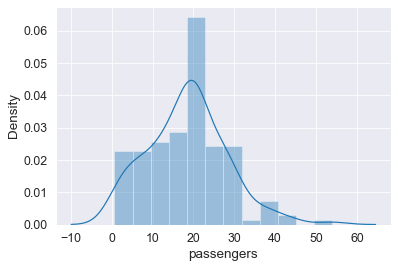

In [39]:
sns.distplot(df["passengers"])

### Insights 2: Countplot

También se aprecia que los mayores fabricantes de barcos pertenecen a Carnival y Royal Caribbean

<AxesSubplot:xlabel='Cruise_line', ylabel='count'>

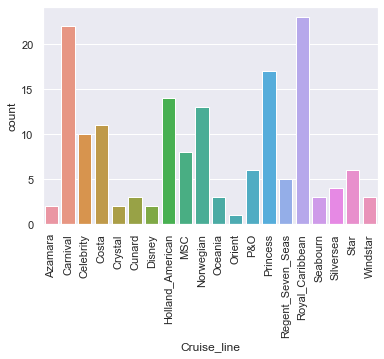

In [7]:
sns_context = sns.set_context("notebook",font_scale=1)
plt.xticks(rotation=90)
sns.countplot(data = df, x = "Cruise_line")

### Insight 3: Boxplot

Cunard y Royan Caribean son las lineas de embaraciones más grandes (lenght) y la más pequeña Windstar

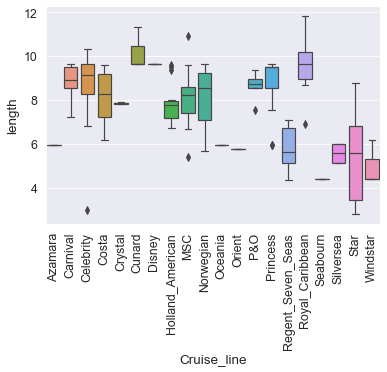

In [45]:
sns.boxplot(x= "Cruise_line", y = "length", data = df)
plt.xticks(rotation=90)
plt.show()

   ### Elijiendo las variables significativas, matriz de correlación


La siguiente matriz de correlación, muestra qué tan ajustados los datos están de una forma lineal, y descubrimos las variables que tienen incidencia sobre la variabilidad de la tripulación (Crew), estas son: 
- El peso de la nave (Tonnage)
- La capacidad de pasajeros (Passengers)
- El tamaño del barco (Lenght)
- La cantidad de cabinas (Cabins)
Estas variables tienen un coeficiente de correlación superior al 90%, por tal motivo usaremos estas variables para ajustar nuestros modelos y descartaremos los años de la nave y la densidad de pasajeros.

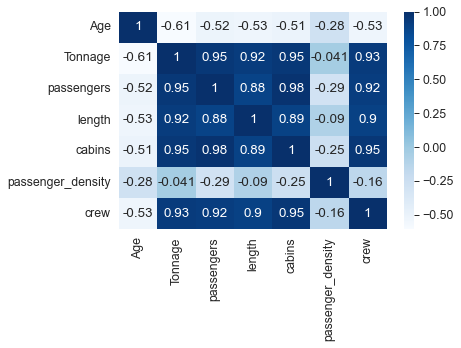

In [107]:
df_cor = df.corr()
sns.heatmap(df_cor, annot = True, cmap = "Blues")
plt.show()

### Modelo 1: Regresión múltiple con Statsmodels

Ajustando un modelo linear múltiple a las variables mencionadas (Tonnage, passengers, lenght, cabins) encontramos que, estas variables explican el 92.4% (R^2) de la variabilidad del tamaño de la tripulación (Crew), además encontramos que la que más explica variabilidad es cabins, cada vez que aumentamos 1 cabina, se incrementa 1 persona (0.79) adicional para la tripulación.

Sobre este modelo encontramos que las variables son significativas con un nivel de confianza del 95% (todas tienen p valor menor al 0.05)

In [60]:
import statsmodels.api as sm
y = df["crew"]
x1 = df[["Tonnage", "passengers", "length", "cabins"]] 

#intercepto:
b = sm.add_constant(x1)
#OLS
resultado = sm.OLS(y,b).fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crew   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     465.3
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           1.67e-84
Time:                        20:20:40   Log-Likelihood:                -218.16
No. Observations:                 158   AIC:                             446.3
Df Residuals:                     153   BIC:                             461.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8187      0.585     -1.400      0.164      -1.974       0.337
Tonnage        0.0163      0.008      2.010      0.046       0.000       0.032
passengers    -0.1499      0.039     -3.863      0.000      -0.226      -0.073
length         0.3976      0.113      3.503      0.001       0.173       0.622
cabins         0.7908      0.087      9.079      0.000       0.619       0.963
==============================================================================
Omnibus:                      140.703   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2601.251
Skew:                           3.098   Prob(JB):                         0.00
Kurtosis:                      21.888   Cond. No.                         642.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Entrenando el modelo y agregando one hot encoding (sklearn)

El one hot encoding permite reconocer a las variables categóricas como dummies para revisar el efecto idiosincrático o de técnología que tendría cada uno de los fabricantes

In [71]:
from sklearn.preprocessing import OneHotEncoder

In [86]:
#Creación del datagframe2, pero la varialbe Cruise_line recibe one hot encondingn
df2 = pd.get_dummies(df[["Cruise_line", "Tonnage", "passengers", "length", "cabins","crew"]])
df2

### Conjuntos de entrenamiento y prueba

In [109]:
from sklearn.model_selection import train_test_split

X = df[cols].iloc[:,0:4].values     
y = df[cols]["crew"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0) 
#el estado aleatoreo 0 representa la semilla para que nos dé siempre el mismo resultado

In [110]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

### Test de residuales

Aquí comprobamos dos cosas, que los residuales son homogeneos al rededor de una media y que se comportan iguales en el set de entrenamiento y en el set de test

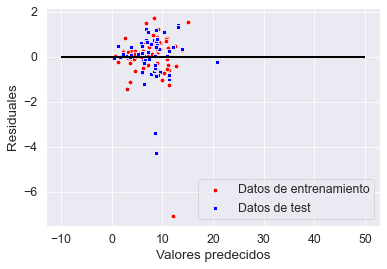

In [120]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c="red", marker="o", edgecolor="white",
            label="Datos de entrenamiento")

plt.scatter(y_test_pred,  y_test_pred - y_test,
            c="blue", marker="s", edgecolor="white",
            label="Datos de test")

plt.xlabel("Valores predecidos")
plt.ylabel("Residuales")
#plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color="black", lw=2)
#plt.xlim([-10, 50])
#plt.tight_layout()
plt.legend(loc= "lower right")

plt.show()

### Coeficiente de Person para el set de entrenamiento y test

In [127]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
      
print("Person para el set de entrenamiento: %.3f" % r2_score(y_train, y_train_pred))
print("Person para el set de test: %.3f" % r2_score(y_test, y_test_pred))


Person para el set de entrenamiento: 0.920
Person para el set de test: 0.928


### Coeficientes de la regresión

Finalmente la regresión dependerá de: Tonnage", "passengers", "length", "cabins". Sus respectivos coeficientes serán:
- Tonnage: 0.01902703
- passengers: -0.15001099
- length: 0.37876395
- cabins: 0.77613801

Estos arrojan valores similares al primer modelo y de nuevo se explica que una cabina adicional hace que se necesiten en promedio 1 personal de tripulación demás.

In [122]:
b0= slr.fit(X_train, y_train).intercept_
b0 #intercepto, en promedio no se necesitan personas de tripulación en los barcos más pequeños, es decir que solo el pasajero podría hacer uso

-0.7525074496158357

In [129]:
#coeficientes
coef = slr.fit(X_train, y_train).coef_
slr.fit(X_train, y_train).coef_ 

array([ 0.01902703, -0.15001099,  0.37876395,  0.77613801])

***

### Conclusiones

Los compradores de barcos tienen que pensar primero en cuántas cabinas necesitan, qué tan grande necesitan el barco y la cantidad de pasajeros para estimar el número total de tripulación (Crew) necesaria.
Por ejemplo:

In [130]:
Peso_del_barco_en_toneladas = 2
peso_coef = 0.01902703

pasajeros = 10
pas_coef = -0.15001099

cabinas = 3
cab_coef = 0.37876395

tamaño_en_metros = 15
tam_coef = 0.77613801



b0 = -0.75
crew = b0 + Peso_del_barco_en_toneladas*peso_coef +pasajeros*pas_coef + cabinas*cab_coef + tamaño_en_metros*tam_coef 
crew

10.56630616

Un cliente que necesite un barco de 2 toneladas, 10 pasajeros, 3 cabinas, y que sea de 15 metros de largo necesitará 10 u 11 personal de tripulación